**Disease Spread and the effect of vaccination**

This notebook will explore a hypothetical SARS-CoV2 outbreak. You will be able to adjust the parameters of disease spread and change the rate of vaccination to explore how a small difference can have a big impact on an outbreak.

This notebook was adapted from this [excellent Medium essay collection](https://towardsdatascience.com/infectious-disease-modelling-part-i-understanding-sir-28d60e29fdfc). If you are interested in further exploring this problem, check out these essays and their accompanying Jupyter notebooks.

To start with, we will import a few Python modules and set up matplotlib to visualize our outbreak.

In [ ]:
from scipy.integrate import odeint
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 
!pip install mpld3
import mpld3
mpld3.enable_notebook()


     |████████████████████████████████| 890kB 5.8MB/s 
  Created wheel for mpld3: filename=mpld3-0.5.2-cp37-none-any.whl size=200617 sha256=d3dbde8c1aa1df1579846e85c58d047a0fd1c42d3f8b91261a8ea701d7df9ddd
  Stored in directory: /root/.cache/pip/wheels/21/73/06/ea4b85609301850b1289a282852d92e22fcbf7a250ed5f547f
Successfully built mpld3


Now that we've set up our environment, we can define our functions. We can use these functions with different parameters to visualize effects on disease spread.

**plotseirdv**: This function makes our graphs of our population over time. We can visualize the change in susceptible (not yet exposed individuals), exposed (individuals who encountered an infected person), infected, recovered and dead individuals. We can also visualize the effects of vaccination if we choose to vaccinate our population.

**deriv**: This function calculates the change over time for the six categories of individuals we will plot.

**summary**: This function reports the numbers for each of the six categories at the end time point for our graph.

In [ ]:
def plotseirdv(t, S, E, I, R, D, V, R0=None, Alpha=None):
  f, ax = plt.subplots(1,1,figsize=(16,6))
  ax.plot(t, S, 'b', alpha=0.7, linewidth=2, label='Susceptible')
  ax.plot(t, E, 'y', alpha=0.7, linewidth=2, label='Exposed')
  ax.plot(t, I, 'r', alpha=0.7, linewidth=2, label='Infected')
  ax.plot(t, R, 'g', alpha=0.7, linewidth=2, label='Recovered')
  ax.plot(t, D, 'k', alpha=0.7, linewidth=2, label='Dead')
  ax.plot(t, V, 'm', alpha=0.7, linewidth=2, label='Vaccinated')

  ax.set_xlabel('Time (days)')
  ax.yaxis.set_tick_params(length=0)
  ax.xaxis.set_tick_params(length=0)
  ax.grid(False)
  legend = ax.legend(borderpad=2.0)
  legend.get_frame().set_alpha(0.5)
  for spine in ('top', 'right', 'bottom', 'left'):
      ax.spines[spine].set_visible(False)
  plt.show();


def deriv(y, t, N, beta, gamma, delta, alpha, rho, sigma):
    S, E, I, R, D, V = y
    dVdt = sigma 
    dSdt = -beta * S * I / N - sigma 
    dEdt = beta * S * I / N - delta * E
    dIdt = delta * E - (1 - alpha) * gamma * I - alpha * rho * I
    dRdt = (1 - alpha) * gamma * I
    dDdt = alpha * rho * I

    return dSdt, dEdt, dIdt, dRdt, dDdt, dVdt

def summary(N, S, E, I, R, D, V):
  print("Of {} British Columbians, ".format(N))
  print("Remaining susceptible on day {}: {}".format(days, int(S[-1])))
  print("Vaccinated by day {}: {}".format(days, int(V[-1])))
  print("Exposed on day {}: {}".format(days, int(E[-1])))
  print("Infected on day {}: {}".format(days, int(I[-1])))
  print("Recovered on day {}: {}".format(days, int(R[-1])))
  print("Total cases on day {}: {}".format(days, int(E[-1] + I[-1] + R[-1] + D[-1])))
  print("British Columbians died of covid19 on day {}: {}".format(days, int(D[-1])))




In this code block we can adjust the parameters and output a graph. The parameters are:

**N**: The number of individuals in our population. Our initial value is **5000**.

**days**: The number of days over which we'll track the outbreak. We'll start tracking **365 days**.

**D**: How many days an infection lasts. While we believe a [covid19 infection](https://en.wikipedia.org/wiki/COVID-19#Prognosis) typically lasts less than 2 weeks, in some individuals it can last a month or longer. We've set the initial value at a short **4 days**.

**R_0**: R_0 is the measure of spread. If R_0 = 1, one infected individual infects one more individual. R_0 < 1 infections tend to die out, while R_0 > 1 infections are very likely to spread. SARS-Cov2 is believed to have a R_0 around [2.6](https://www.bmj.com/content/369/bmj.m1891), but it may be as high as 4.6. We've set a default value of **2.5**.

**alpha**: Alpha is the death rate for this infection. We've set it at a default of 20% (**0.2**), but the estimated death rate for SARS-CoV2 is not one single value. Different age groups show differences in mortality, as do different ethnic groups, with an overall rate for all infected individuals somewhere between [0.5 and 2%](https://en.wikipedia.org/wiki/COVID-19#Mortality).

**gamma**: Gamma is the recovery rate. Per day of infection *D*, we've set a default of **1 individual** recovering.

**delta**: Delta is the incubation period. The World Health Organization reports that the average incubation period is [5 to 6 days](https://www.who.int/news-room/commentaries/detail/transmission-of-sars-cov-2-implications-for-infection-prevention-precautions#:~:text=The%20incubation%20period%20of%20COVID,to%20a%20confirmed%20case.), but may be as long as 14 days. We've set our initial delta value as **5.0**.

**beta**: Beta is the number of individuals an infected individual infects per day of their infection. This is dependent on R_0 and gamma, so changes in one of those variables will adjust beta as well.

**rho**: Rho is the number of days from initial infection to death, for those individuals who will die. The median number of days from initial infection to death is estimated at [18.5 days](https://www.drugs.com/medical-answers/covid-19-symptoms-progress-death-3536264/). We've set a default for this model at **9 days**.

**sigma**: Sigma is the number of individuals per day who are vaccinated. This is a constant rate of increase, and assumes that a vaccination facility is vaccinating the maximum number of individuals it can per day. We've set a default value of **100**. To model the effects of no vaccination, set this value to **0**.

Try plotting the default values, and then try adjusting individual values to see the effects.

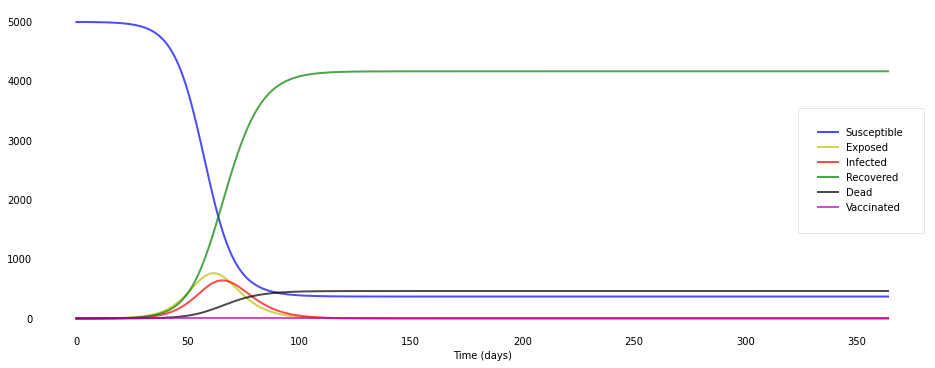

Of 5000 British Columbians, 
Remaining susceptible on day 365: 369
Vaccinated by day 365: 0
Exposed on day 365: 0
Infected on day 365: 0
Recovered on day 365: 4167
Total cases on day 365: 4630
British Columbians died of covid19 on day 365: 463


In [ ]:
N = 5000
days = 365

D = 4.0                                         # how many days an infection lasts
R_0 = 2.5
alpha = 0.2                                     # 20% death rate
delta = 1.0 / 5.0                               # incubation period of five days
gamma = 1.0 / D                                 # proportion of people who recover each day
beta = R_0 * gamma
rho = 1/9                                       # 9 days from infection until death
sigma = 100 / D                                 # number of people vaccinated per day

S0, E0, I0, R0, D0, V0 = N-1, 1, 0, 0, 0, 0     # initial conditions: one exposed
t = np.linspace(0, days-1, days)                # Grid of time points (in days)
y0 = S0, E0, I0, R0, D0, V0                     # Initial conditions vector

# Integrate the SEIRDV equations over the time grid, t.
ret = odeint(deriv, y0, t, args=(N, beta, gamma, delta, alpha, rho, sigma))
S, E, I, R, D, V = ret.T
S = np.where(S < 0, 0, S)
V = np.where(V > N, N, V)

plotseirdv(t, S, E, I, R, D, V)
summary(N, S, E, I, R, D, V)


Some numbers that may be interesting to model:

Population of British Columbia: 5071000

Population of Vancouver Island: 870297

Population of Greater Victoria: 401700

Mortality rate seen in 85 year old patients: 15%




This is only a model of what a covid19 outbreak might look like. What are some features our model doesn't consider?